**Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import networkx as nx
from scipy.spatial.distance import pdist, squareform

**Koordinaten importieren**

In [3]:
df = pd.read_excel("Erdbeerfelder.xlsx", sheet_name=0, skiprows=1, usecols="C:D",names=["x","y"])
df = df.astype(float)

**Erdbeer-Feld Plotten**

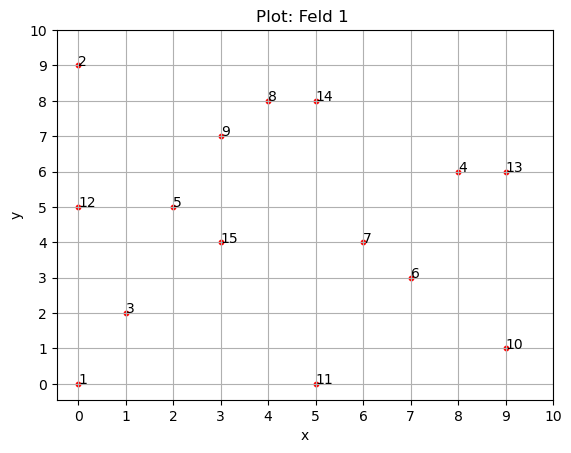

In [4]:
plt.scatter(df["x"], df["y"],s=10,c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot: Feld 1 ")
plt.grid(True)
for i, txt in enumerate(df.index):
    plt.annotate(txt + 1, (df["x"][i], df["y"][i]))
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))
plt.show()

**Erstellung der Distanzmatrix (euklidische Distanz)**

In [5]:
# Berechnung der Distanzmatrix
dist_matrix = squareform(pdist(df))


**Erstellen des Netzwerkes mit networkX**

In [6]:
# Erstellung des Netzwerks
G = nx.Graph()

# Hinzufügen der Knoten
for i in range(len(df)):
    G.add_node(i,x=df["x"][i], y=df["y"][i])

# Hinzufügen der Kanten mit den Distanzen als Gewicht
for i in range(len(df)):
    for j in range(len(df)):
        G.add_edge(i, j, weight=dist_matrix[i][j])

**Berechnung des minimalen Spannbaums und des zugehörigen Schlauchlänge**

In [7]:
# Berechnung des minimalen Spannbaums
T = nx.minimum_spanning_tree(G)
total_length = 0
for u, v in T.edges():
    total_length += G[u][v]['weight']

**Plotten des minimalen spannenden Baum**

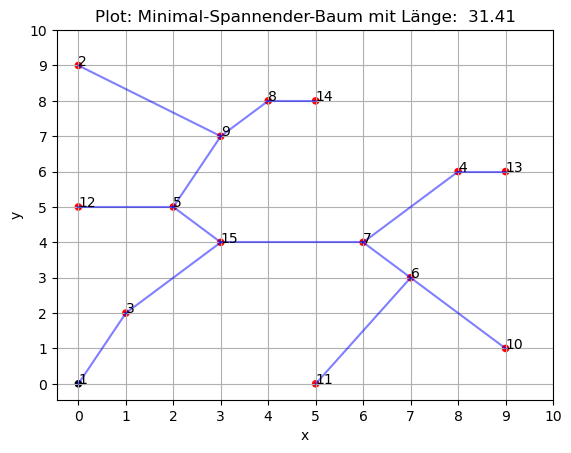

In [8]:
colors = ["black" if (x, y) == (0, 0) else "red" for x, y in zip(df["x"], df["y"])]
plt.scatter(df["x"], df["y"], s=20, c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot: Minimal-Spannender-Baum mit Länge:  " + str(round(total_length, 2)))
plt.grid(True)

for i, txt in enumerate(df.index):
    plt.annotate(txt + 1, (df["x"][i], df["y"][i]))

for (u, v) in T.edges():
    x1, y1 = G.nodes[u]["x"], G.nodes[u]["y"]
    x2, y2 = G.nodes[v]["x"], G.nodes[v]["y"]
    plt.plot([x1, x2], [y1, y2], 'b-', alpha=0.5)

plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

plt.show()


Aufgabe a2

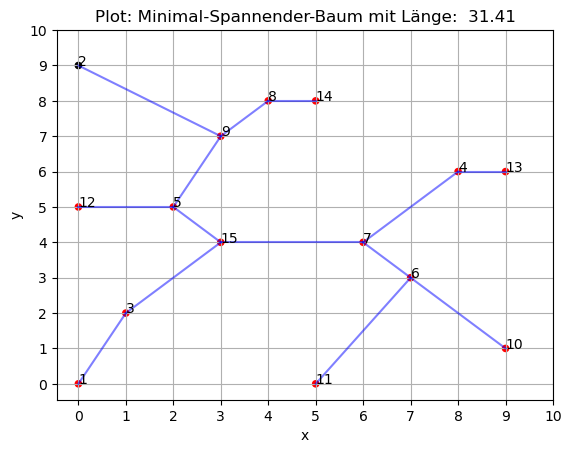

In [9]:
colors = ["black" if (x, y) == (0, 9) else "red" for x, y in zip(df["x"], df["y"])]
plt.scatter(df["x"], df["y"], s=20, c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot: Minimal-Spannender-Baum mit Länge:  " + str(round(total_length, 2)))
plt.grid(True)

for i, txt in enumerate(df.index):
    plt.annotate(txt + 1, (df["x"][i], df["y"][i]))

for (u, v) in T.edges():
    x1, y1 = G.nodes[u]["x"], G.nodes[u]["y"]
    x2, y2 = G.nodes[v]["x"], G.nodes[v]["y"]
    plt.plot([x1, x2], [y1, y2], 'b-', alpha=0.5)

plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

plt.show()
